In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("D:\Yash\School\IP\PROJECT\car_sales_data_2.csv")

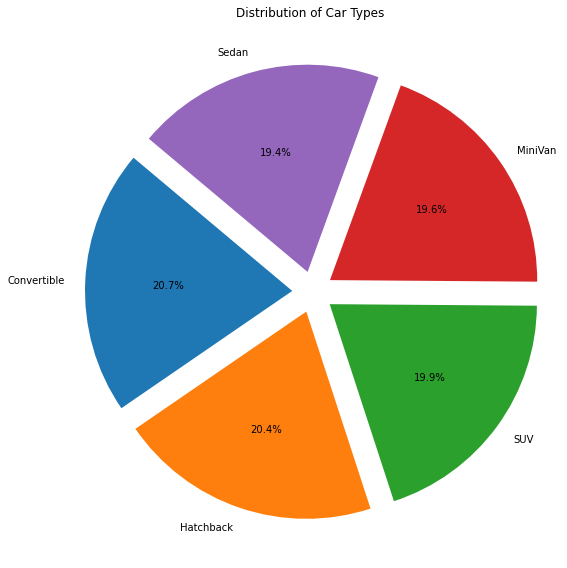

In [6]:
car_type_count = data['Car Type'].value_counts()

explode = [0.1 if i == 0 else 0.1 for i in range(len(car_type_count))]

# Creating a pie chart with an exploded slice
plt.figure(figsize=(8, 8))
plt.pie(car_type_count, labels=car_type_count.index, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Distribution of Car Types')
plt.axis('equal')  
plt.tight_layout()
plt.show()

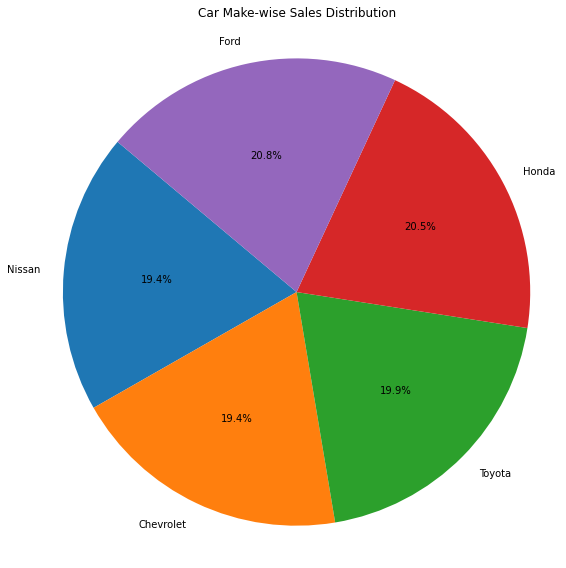

In [11]:
car_make_sales = data.groupby('Car Make')['Sale Price'].sum().sort_values()
    
plt.figure(figsize=(8, 8))
plt.pie(car_make_sales, labels=car_make_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Car Make-wise Sales Distribution')
plt.axis('equal')  
plt.tight_layout()
plt.show()

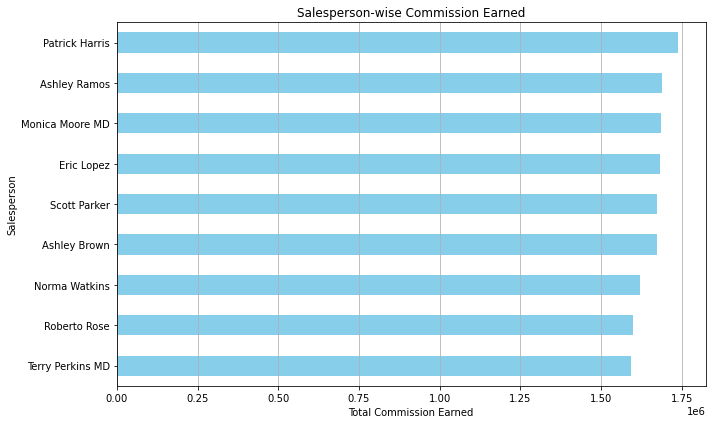

In [12]:
salesperson_commission = data.groupby('Salesperson')['Commission Earned'].sum().sort_values()

# Creating a bar plot for salesperson-wise commissions
plt.figure(figsize=(10, 6))
salesperson_commission.plot(kind='barh', color='skyblue')
plt.title('Salesperson-wise Commission Earned')
plt.xlabel('Total Commission Earned')
plt.ylabel('Salesperson')
plt.grid(axis='x')  # Adding gridlines along the x-axis for better readability
plt.tight_layout()
plt.show()

<Figure size 720x360 with 0 Axes>

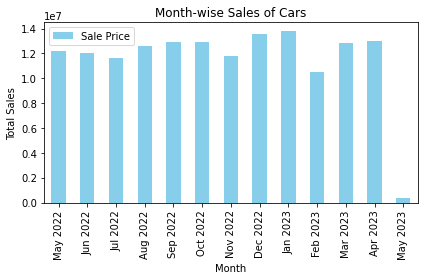

In [13]:
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.strftime('%b %Y') 
    
month_wise_sales = data.groupby('Month')['Sale Price'].sum()
month_wise_sales = month_wise_sales.reset_index()

month_wise_sales['Date'] = pd.to_datetime(month_wise_sales['Month'], format='%b %Y')
month_wise_sales = month_wise_sales.sort_values('Date')
month_wise_sales.set_index('Month', inplace=True)
del month_wise_sales['Date']

plt.figure(figsize=(10, 5))

month_wise_sales.plot(kind='bar', color='skyblue')
plt.title('Month-wise Sales of Cars')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
    
plt.tight_layout()
plt.show()

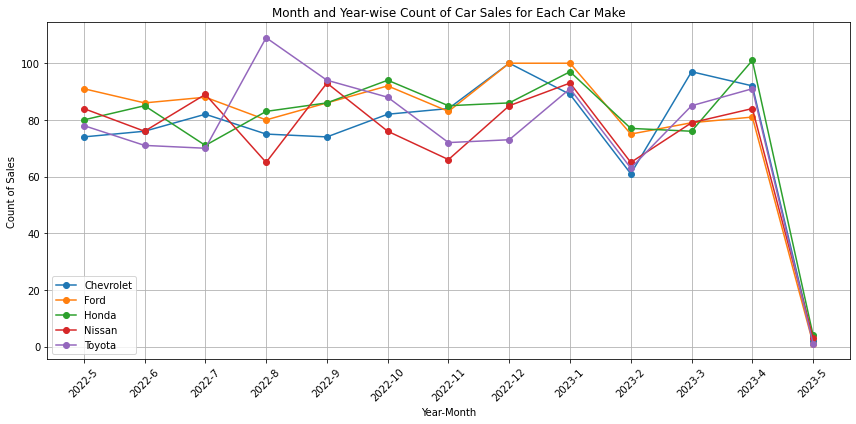

In [14]:
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

car_make_month_year_count = data.groupby(['Car Make', 'Year', 'Month']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))

for car_make, df in car_make_month_year_count.groupby('Car Make'):
    plt.plot(df['Year'].astype(str) + '-' + df['Month'].astype(str), df['Count'], marker='o', label=car_make)

plt.title('Month and Year-wise Count of Car Sales for Each Car Make')
plt.xlabel('Year-Month')
plt.ylabel('Count of Sales')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()